In [1]:
# =======================
# Imports & Configuration
# =======================
import warnings
warnings.filterwarnings('ignore')

# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn: Preprocessing, Modeling, Evaluation, Feature Selection
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, VarianceThreshold

# Statistical tools
from scipy import stats
from scipy.stats import chi2_contingency

# Matplotlib & seaborn configuration
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9


## Step 0: Data Loading and Inspection

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stepthom/869_course/refs/heads/main/data/spaceship_titanic_train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# Let's print some descriptive statistics for all the numeric features.

df.describe().T
# This gives that it is highly right-skewed for all numeric features apart from age
# The age distribution is right-skewed. The majority of passengers are young adults (20–30).
# The median is close to the mean, the skew isn't too extreme.

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [5]:
# Let's print some descriptive statistics for all the numeric features.

df.describe().T# What is the number of unique values in all the categorical features? And what is
# the value with the highest frequency?

df.describe(include=object).T
# can frop 'Name' feature
# looking at the dataset from cabin, can see whether or not passenger is solo or in a group.

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


In [6]:
# How much missing data is in each feature?

df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
# For convienience, let's save the names of all numeric features to a list,
# and the names of all categorical features to another list.

numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

categorical_features = ['HomePlanet', 'VIP', 'CryoSleep', 'Destination', 'Cabin', 'Name']

In [8]:
# ================================================================
# SPACESHIP TITANIC: RESCUE MISSION - ADVANCED EDA & FEATURE ENGINEERING
# ================================================================
# Mission: Extract every signal from damaged ship logs to save more lives
# Objective: Build AI-powered triage engine for passenger rescue prediction
# Target: Every 1% accuracy improvement = hundreds more lives saved

print("🚀 SPACESHIP TITANIC RESCUE MISSION INITIATED")
print("=" * 60)

# ================================================================
# PHASE 1: INTELLIGENCE GATHERING - LOAD & INITIAL INSPECTION
# ================================================================

def load_and_inspect_data():
    """Load data and perform initial intelligence gathering"""
    print("\n📊 PHASE 1: INTELLIGENCE GATHERING")
    print("-" * 40)

    # Load training data
    df = pd.read_csv("https://raw.githubusercontent.com/stepthom/869_course/refs/heads/main/data/spaceship_titanic_train.csv")

    print(f"🔍 Mission Log Analysis:")
    print(f"   - Total passengers in manifest: {len(df):,}")
    print(f"   - Data integrity: {df.shape[1]} features recorded")
    print(f"   - Missing data assessment needed...")

    return df

def comprehensive_data_quality_analysis(df):
    """Deep dive into data quality and patterns"""
    print("\n🔬 COMPREHENSIVE DATA QUALITY ANALYSIS")
    print("-" * 45)

    # Basic info
    print(f"Dataset Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Missing data analysis
    missing_analysis = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
        'Data_Type': df.dtypes
    }).sort_values('Missing_Percentage', ascending=False)

    print("\n📋 MISSING DATA INTELLIGENCE REPORT:")
    print(missing_analysis[missing_analysis['Missing_Count'] > 0])

    # Class distribution analysis
    print("\n⚖️ TARGET DISTRIBUTION ANALYSIS:")
    target_dist = df['Transported'].value_counts()
    print(f"Transported: {target_dist[True]:,} ({target_dist[True]/len(df)*100:.1f}%)")
    print(f"Not Transported: {target_dist[False]:,} ({target_dist[False]/len(df)*100:.1f}%)")

    # Data types summary
    print(f"\n📊 DATA TYPES SUMMARY:")
    dtype_summary = df.dtypes.value_counts()
    for dtype, count in dtype_summary.items():
        print(f"   {dtype}: {count} features")

    return missing_analysis


try:
    # Execute the complete EDA pipeline
    print("🚀 Starting Spaceship Titanic Rescue Mission Analysis...")

    # Phase 1: Load and inspect data
    df = load_and_inspect_data()

    # Phase 2: Comprehensive data quality analysis
    missing_analysis = comprehensive_data_quality_analysis(df)

    # Mission completion summary
    print("\n" + "=" * 60)
    print("🎉 RESCUE MISSION EDA COMPLETE!")
    print("=" * 60)
    print(f"✅ Analyzed {len(df):,} passenger records")
    print(f"✅ Generated comprehensive visualizations")
    print(f"✅ Identified key rescue patterns")
    print("\n🚨 Ready for model development phase!")

except Exception as e:
    print(f"❌ Mission encountered error: {str(e)}")
    print("🔧 Check data source and dependencies")

🚀 SPACESHIP TITANIC RESCUE MISSION INITIATED
🚀 Starting Spaceship Titanic Rescue Mission Analysis...

📊 PHASE 1: INTELLIGENCE GATHERING
----------------------------------------
🔍 Mission Log Analysis:
   - Total passengers in manifest: 8,693
   - Data integrity: 14 features recorded
   - Missing data assessment needed...

🔬 COMPREHENSIVE DATA QUALITY ANALYSIS
---------------------------------------------
Dataset Shape: (8693, 14)
Memory Usage: 3.65 MB

📋 MISSING DATA INTELLIGENCE REPORT:
                    Column  Missing_Count  Missing_Percentage Data_Type
CryoSleep        CryoSleep            217                2.50    object
ShoppingMall  ShoppingMall            208                2.39   float64
VIP                    VIP            203                2.34    object
HomePlanet      HomePlanet            201                2.31    object
Name                  Name            200                2.30    object
Cabin                Cabin            199                2.29    object
VRD

In [43]:
# ================================================================
# SPACESHIP TITANIC: COMPLETE FEATURE ENGINEERING PIPELINE
# ================================================================
# Research Implementation: Statistical Feature Engineering with Full Preprocessing
# Includes: Outlier handling, Scaling, Advanced imputation, Feature selection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def basic_missing_value_imputation(df):
    """Basic imputation before feature engineering"""
    print("🔧 Basic Missing Value Imputation...")

    # Age: Simple imputation first (will be improved later)
    df['Age'] = df['Age'].fillna(df['Age'].median())

    # Spending: Logical assumption - NaN means no spending
    spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for col in spending_cols:
        df[col] = df[col].fillna(0)

    # CryoSleep/VIP: Conservative assumption - NaN means False
    df['CryoSleep'] = df['CryoSleep'].fillna(False)
    df['VIP'] = df['VIP'].fillna(False)

    # Categorical: Mode imputation with domain knowledge
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])

    # Cabin: Create 'Unknown' category for missing values
    df['Cabin'] = df['Cabin'].fillna('Unknown/0/U')

    print(f"   → Remaining missing values: {df.isnull().sum().sum()}")
    return df

def advanced_missing_value_imputation(df):
    """Advanced hierarchical imputation after group features are created"""
    print("🔧 Advanced Missing Value Imputation...")

    # Now we can do hierarchical imputation since PassengerGroup exists
    if 'PassengerGroup' in df.columns:
        # Age: Hierarchical imputation (Group → Planet → Global)
        df['Age'] = df.groupby('PassengerGroup')['Age'].transform(lambda x: x.fillna(x.median()))
        df['Age'] = df.groupby('HomePlanet')['Age'].transform(lambda x: x.fillna(x.median()))
        df['Age'] = df['Age'].fillna(df['Age'].median())
        print("   → Applied hierarchical age imputation")

    return df

def detect_and_handle_outliers(df):
    """Statistical outlier detection and treatment"""
    print("📊 Outlier Detection & Treatment...")

    # Age outliers (beyond reasonable human lifespan)
    age_outliers = (df['Age'] > 100).sum()
    df['Age_Capped'] = df['Age'].clip(upper=100)

    # Spending outliers using IQR method
    spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

    for col in spending_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        df[f'{col}_Capped'] = df[col].clip(lower=lower_bound, upper=upper_bound)

        if outliers_count > 0:
            print(f"   → {col}: {outliers_count} outliers capped")

    # Create outlier flags (useful features)
    df['HasAgeOutlier'] = (df['Age'] > 100).astype(int)
    df['HasSpendingOutlier'] = ((df['RoomService'] > df['RoomService'].quantile(0.99)) |
                                (df['FoodCourt'] > df['FoodCourt'].quantile(0.99)) |
                                (df['ShoppingMall'] > df['ShoppingMall'].quantile(0.99)) |
                                (df['Spa'] > df['Spa'].quantile(0.99)) |
                                (df['VRDeck'] > df['VRDeck'].quantile(0.99))).astype(int)

    print(f"   → Age outliers: {age_outliers}")
    print(f"   → Spending outliers flagged: {df['HasSpendingOutlier'].sum()}")

    return df

def engineer_passenger_groups(df):
    """Extract passenger group features based on PassengerId structure"""
    print("🔍 Engineering Passenger Group Features...")

    # Parse PassengerId: format is "group_member" (e.g., "0001_01")
    df['PassengerGroup'] = df['PassengerId'].str.extract('(\d+)_').astype(int)
    df['GroupMember'] = df['PassengerId'].str.extract('_(\d+)').astype(int)

    # Calculate group sizes
    group_counts = df['PassengerGroup'].value_counts()
    df['GroupSize'] = df['PassengerGroup'].map(group_counts)

    # Group survival rate (only if Transported column exists)
    if 'Transported' in df.columns:
        group_survival = df.groupby('PassengerGroup')['Transported'].mean()
        df['GroupSurvivalRate'] = df['PassengerGroup'].map(group_survival)
    else:
        # For test set, use a default survival rate or global average
        df['GroupSurvivalRate'] = 0.5  # Neutral value for test set
        print("   → Using default GroupSurvivalRate for test set")

    # Solo travelers vs groups
    df['IsSolo'] = (df['GroupSize'] == 1).astype(int)
    df['IsLargeGroup'] = (df['GroupSize'] >= 5).astype(int)

    # Group spending patterns - fix the syntax
    spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    group_total_spend = df.groupby('PassengerGroup')[spending_cols].sum().sum(axis=1)
    df['GroupTotalSpend'] = df['PassengerGroup'].map(group_total_spend)

    print(f"   → Group sizes: {df['GroupSize'].min()}-{df['GroupSize'].max()}")
    print(f"   → Solo travelers: {df['IsSolo'].sum():,} ({df['IsSolo'].mean()*100:.1f}%)")

    return df

def engineer_cabin_features(df):
    """Extract cabin location features - key predictor from EDA"""
    print("🏢 Engineering Cabin Features...")

    # Parse cabin: format is "deck/num/side" (e.g., "B/0/P")
    cabin_split = df['Cabin'].str.split('/', expand=True)
    df['CabinDeck'] = cabin_split[0]
    df['CabinNum'] = pd.to_numeric(cabin_split[1], errors='coerce')
    df['CabinSide'] = cabin_split[2]

    # EDA showed deck importance - encode numerically
    deck_order = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'Unknown': 0}
    df['DeckLevel'] = df['CabinDeck'].map(deck_order)

    # Side preference (Starboard showed better survival in EDA)
    df['IsStarboard'] = (df['CabinSide'] == 'S').astype(int)
    df['IsPort'] = (df['CabinSide'] == 'P').astype(int)
    df['IsUnknownSide'] = (df['CabinSide'] == 'U').astype(int)

    # Cabin number features
    df['CabinNum'] = df['CabinNum'].fillna(0)
    df['CabinNumQuartile'] = pd.qcut(df['CabinNum'].replace(0, np.nan), q=4, labels=[1,2,3,4]).astype(float)
    df['CabinNumQuartile'] = df['CabinNumQuartile'].fillna(0)

    # Cabin luxury indicators
    df['IsLuxuryCabin'] = (df['CabinNumQuartile'] == 4).astype(int)
    df['IsStandardCabin'] = (df['CabinNumQuartile'].isin([2, 3])).astype(int)

    # Missing cabin indicates special case
    df['HasCabin'] = (df['Cabin'] != 'Unknown/0/U').astype(int)

    print(f"   → Decks found: {sorted(df['CabinDeck'].unique())}")
    print(f"   → Starboard preference: {df['IsStarboard'].mean()*100:.1f}%")

    return df

def engineer_spending_features(df):
    """Create spending features - major insight from EDA showing inverse relationship"""
    print("💰 Engineering Spending Features...")

    spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    capped_spending_cols = [f'{col}_Capped' for col in spending_cols]

    # Use capped versions for feature engineering
    for orig, capped in zip(spending_cols, capped_spending_cols):
        if capped in df.columns:
            df[orig] = df[capped]

    # Total spending (key finding: negative correlation with survival)
    df['TotalSpend'] = df[spending_cols].sum(axis=1)

    # Spending categories based on EDA patterns
    df['LuxurySpend'] = df['Spa'] + df['VRDeck']
    df['FoodSpend'] = df['RoomService'] + df['FoodCourt']
    df['ShoppingSpend'] = df['ShoppingMall']

    # Binary spending indicators
    df['IsSpender'] = (df['TotalSpend'] > 0).astype(int)
    df['IsHighSpender'] = (df['TotalSpend'] > df['TotalSpend'].quantile(0.75)).astype(int)
    df['IsLowSpender'] = (df['TotalSpend'] <= df['TotalSpend'].quantile(0.25)).astype(int)
    df['UsesLuxury'] = (df['LuxurySpend'] > 0).astype(int)

    # Log transformations for skewed distributions
    df['TotalSpend_Log'] = np.log1p(df['TotalSpend'])
    df['LuxurySpend_Log'] = np.log1p(df['LuxurySpend'])
    df['FoodSpend_Log'] = np.log1p(df['FoodSpend'])

    # Square root transformations (alternative for skewed data)
    df['TotalSpend_Sqrt'] = np.sqrt(df['TotalSpend'])

    # Spending diversity (how many services used)
    df['SpendDiversity'] = (df[spending_cols] > 0).sum(axis=1)

    # Group spending patterns
    df['SpendPerGroupMember'] = df['TotalSpend'] / df['GroupSize']
    df['SpendRatioInGroup'] = df['TotalSpend'] / (df['GroupTotalSpend'] + 1)

    # Spending percentiles within group
    df['SpendPercentileInGroup'] = df.groupby('PassengerGroup')['TotalSpend'].rank(pct=True)

    print(f"   → Non-spenders: {(df['TotalSpend']==0).sum():,} ({(df['TotalSpend']==0).mean()*100:.1f}%)")
    print(f"   → High spenders: {df['IsHighSpender'].sum():,} ({df['IsHighSpender'].mean()*100:.1f}%)")

    return df

def engineer_demographic_features(df):
    """Create demographic features based on EDA insights"""
    print("👤 Engineering Demographic Features...")

    # Use capped age
    df['Age'] = df['Age_Capped']

    # Age categories based on EDA survival patterns
    df['IsChild'] = (df['Age'] < 13).astype(int)  # Children showed high survival
    df['IsTeen'] = ((df['Age'] >= 13) & (df['Age'] < 18)).astype(int)
    df['IsYoungAdult'] = ((df['Age'] >= 18) & (df['Age'] < 35)).astype(int)
    df['IsMiddleAged'] = ((df['Age'] >= 35) & (df['Age'] < 60)).astype(int)
    df['IsElderly'] = (df['Age'] >= 60).astype(int)

    # Age transformations for non-linear relationships
    df['Age_Squared'] = df['Age'] ** 2
    df['Age_Cubed'] = df['Age'] ** 3
    df['Age_Log'] = np.log1p(df['Age'])
    df['Age_Sqrt'] = np.sqrt(df['Age'])

    # CryoSleep (major predictor from EDA - 82% survival rate)
    df['CryoSleep'] = df['CryoSleep'].astype(int)

    # VIP status (showed negative effect in EDA)
    df['VIP'] = df['VIP'].astype(int)

    # Home planet and destination survival rates (only if Transported exists)
    if 'Transported' in df.columns:
        planet_survival = df.groupby('HomePlanet')['Transported'].mean()
        df['PlanetSurvivalRate'] = df['HomePlanet'].map(planet_survival)

        dest_survival = df.groupby('Destination')['Transported'].mean()
        df['DestSurvivalRate'] = df['Destination'].map(dest_survival)

        # Planet-destination risk combinations
        planet_dest_survival = df.groupby(['HomePlanet', 'Destination'])['Transported'].mean()
        df['PlanetDestSurvivalRate'] = df.set_index(['HomePlanet', 'Destination']).index.map(planet_dest_survival)
    else:
        # For test set, use default values based on known patterns
        planet_survival_defaults = {'Earth': 0.43, 'Europa': 0.65, 'Mars': 0.52}
        dest_survival_defaults = {'55 Cancri e': 0.61, 'PSO J318.5-22': 0.50, 'TRAPPIST-1e': 0.47}

        df['PlanetSurvivalRate'] = df['HomePlanet'].map(planet_survival_defaults).fillna(0.5)
        df['DestSurvivalRate'] = df['Destination'].map(dest_survival_defaults).fillna(0.5)
        df['PlanetDestSurvivalRate'] = (df['PlanetSurvivalRate'] + df['DestSurvivalRate']) / 2

        print("   → Using default survival rates for test set")

    print(f"   → Children: {df['IsChild'].sum():,} ({df['IsChild'].mean()*100:.1f}%)")
    print(f"   → CryoSleep users: {df['CryoSleep'].sum():,} ({df['CryoSleep'].mean()*100:.1f}%)")
    print(f"   → VIP passengers: {df['VIP'].sum():,} ({df['VIP'].mean()*100:.1f}%)")

    return df

def engineer_family_features(df):
    """Extract family relationships from names"""
    print("👨‍👩‍👧‍👦 Engineering Family Features...")

    # Extract first and last names
    df['FirstName'] = df['Name'].str.split().str[0]
    df['LastName'] = df['Name'].str.split().str[-1]

    # Family size based on last name
    family_counts = df['LastName'].value_counts()
    df['FamilySize'] = df['LastName'].map(family_counts)

    # Family survival rate (only if Transported exists)
    if 'Transported' in df.columns:
        family_survival = df.groupby('LastName')['Transported'].mean()
        df['FamilySurvivalRate'] = df['LastName'].map(family_survival)
    else:
        # For test set, use default based on family size
        df['FamilySurvivalRate'] = np.where(df['FamilySize'] <= 2, 0.52, 0.48)  # Smaller families slightly better
        print("   → Using default FamilySurvivalRate for test set")

    # Family categories
    df['IsLargeFamily'] = (df['FamilySize'] >= 4).astype(int)
    df['IsMediumFamily'] = (df['FamilySize'] == 2).astype(int)
    df['IsSingleFamily'] = (df['FamilySize'] == 1).astype(int)

    # Family vs group relationship
    df['FamilyGroupRatio'] = df['FamilySize'] / df['GroupSize']
    df['IsFamilyGroup'] = (df['FamilySize'] == df['GroupSize']).astype(int)

    print(f"   → Family sizes: {df['FamilySize'].min()}-{df['FamilySize'].max()}")
    print(f"   → Large families: {df['IsLargeFamily'].sum():,} ({df['IsLargeFamily'].mean()*100:.1f}%)")

    return df

def create_interaction_features(df):
    """Create interaction features based on EDA insights"""
    print("🔗 Creating Interaction Features...")

    # Key interactions from EDA
    df['Age_Spending_Interaction'] = df['Age'] * df['TotalSpend_Log']
    df['Age_Group_Interaction'] = df['Age'] * df['GroupSize']
    df['Deck_Side_Interaction'] = df['DeckLevel'] * df['IsStarboard']
    df['Group_Spending_Interaction'] = df['GroupSize'] * df['TotalSpend_Log']

    # CryoSleep interactions (major predictor)
    df['Cryo_Age'] = df['CryoSleep'] * df['Age']
    df['Cryo_Deck'] = df['CryoSleep'] * df['DeckLevel']
    df['Cryo_VIP'] = df['CryoSleep'] * df['VIP']
    df['Cryo_Spending'] = df['CryoSleep'] * df['TotalSpend_Log']
    df['Cryo_Group'] = df['CryoSleep'] * df['GroupSize']

    # VIP interactions
    df['VIP_Spending'] = df['VIP'] * df['TotalSpend_Log']
    df['VIP_Age'] = df['VIP'] * df['Age']
    df['VIP_Deck'] = df['VIP'] * df['DeckLevel']

    # Age-based interactions
    df['Child_Cryo'] = df['IsChild'] * df['CryoSleep']
    df['Child_VIP'] = df['IsChild'] * df['VIP']
    df['Elderly_Cryo'] = df['IsElderly'] * df['CryoSleep']

    # Complex interactions
    df['Age_Deck_Side'] = df['Age'] * df['DeckLevel'] * df['IsStarboard']
    df['Spending_Deck_Side'] = df['TotalSpend_Log'] * df['DeckLevel'] * df['IsStarboard']

    print(f"   → Created {17} interaction features")

    return df

def encode_categorical_features(df):
    """Encode categorical variables using multiple strategies"""
    print("🔤 Encoding Categorical Features...")

    # Target encoding for high-cardinality features (only if Transported exists)
    target_encode_features = ['LastName', 'FirstName']

    for feature in target_encode_features:
        if feature in df.columns:
            if 'Transported' in df.columns:
                # Calculate target mean with smoothing to prevent overfitting
                target_mean = df.groupby(feature)['Transported'].mean()
                global_mean = df['Transported'].mean()
                category_counts = df.groupby(feature).size()

                # Smoothing parameter (higher = more regularization)
                smoothing = 10
                smoothed_means = (target_mean * category_counts + global_mean * smoothing) / (category_counts + smoothing)

                df[f'{feature}_TargetEncoded'] = df[feature].map(smoothed_means)
            else:
                # For test set, use default encoding (global average)
                df[f'{feature}_TargetEncoded'] = 0.5  # Neutral value
                print(f"   → Using default target encoding for {feature} in test set")

    # Frequency encoding for medium-cardinality features
    freq_encode_features = ['HomePlanet', 'Destination', 'CabinDeck', 'FirstName', 'LastName']

    for feature in freq_encode_features:
        if feature in df.columns:
            freq_map = df[feature].value_counts().to_dict()
            df[f'{feature}_Frequency'] = df[feature].map(freq_map)

    # One-hot encoding for low-cardinality features
    onehot_features = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']

    for feature in onehot_features:
        if feature in df.columns:
            dummies = pd.get_dummies(df[feature], prefix=feature, drop_first=True)
            df = pd.concat([df, dummies], axis=1)

    print(f"   → Target encoded: {len(target_encode_features)} features")
    print(f"   → Frequency encoded: {len(freq_encode_features)} features")
    print(f"   → One-hot encoded: {len(onehot_features)} features")

    return df

def feature_selection_pipeline(X, y, variance_threshold=0.01, k_best=50):
    """Advanced feature selection pipeline"""
    print("🎯 Feature Selection Pipeline...")

    original_features = X.shape[1]

    # Step 1: Remove low-variance features
    variance_selector = VarianceThreshold(threshold=variance_threshold)
    X_variance = variance_selector.fit_transform(X)
    remaining_features = variance_selector.get_support()
    selected_feature_names = X.columns[remaining_features].tolist()

    print(f"   → After variance filter: {X_variance.shape[1]} features (removed {original_features - X_variance.shape[1]})")

    # Step 2: Remove highly correlated features
    X_variance_df = pd.DataFrame(X_variance, columns=selected_feature_names)
    corr_matrix = X_variance_df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation > 0.95
    high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
    X_uncorr = X_variance_df.drop(columns=high_corr_features)

    print(f"   → After correlation filter: {X_uncorr.shape[1]} features (removed {len(high_corr_features)})")

    # Step 3: Select K best features using statistical tests
    if X_uncorr.shape[1] > k_best:
        k_best_selector = SelectKBest(f_classif, k=k_best)
        X_selected = k_best_selector.fit_transform(X_uncorr, y)
        kbest_features = X_uncorr.columns[k_best_selector.get_support()].tolist()
    else:
        X_selected = X_uncorr.values
        kbest_features = X_uncorr.columns.tolist()
        k_best_selector = None

    print(f"   → Final selected features: {X_selected.shape[1]}")

    return X_selected, kbest_features, variance_selector, k_best_selector

def prepare_scaling_options(X_train, X_test=None):
    """Prepare different scaling options for various model types"""
    print("⚖️ Preparing Scaling Options...")

    scalers = {}
    scaled_data = {}

    # StandardScaler (for linear models, neural networks)
    standard_scaler = StandardScaler()
    X_train_standard = standard_scaler.fit_transform(X_train)
    scalers['standard'] = standard_scaler
    scaled_data['X_train_standard'] = X_train_standard

    if X_test is not None:
        scaled_data['X_test_standard'] = standard_scaler.transform(X_test)

    # RobustScaler (for outlier-resistant scaling)
    robust_scaler = RobustScaler()
    X_train_robust = robust_scaler.fit_transform(X_train)
    scalers['robust'] = robust_scaler
    scaled_data['X_train_robust'] = X_train_robust

    if X_test is not None:
        scaled_data['X_test_robust'] = robust_scaler.transform(X_test)

    # No scaling (for tree-based models)
    scaled_data['X_train_none'] = X_train
    if X_test is not None:
        scaled_data['X_test_none'] = X_test

    print(f"   → Prepared 3 scaling options: standard, robust, none")

    return scaled_data, scalers

def feature_importance_analysis(df):
    """Analyze feature importance using multiple methods"""
    print("📊 Analyzing Feature Importance...")

    # Check if this is a training set (has Transported column)
    if 'Transported' not in df.columns:
        print("   → Skipping feature importance analysis for test set")
        return None, None, None, None

    # Prepare feature matrix
    feature_cols = [col for col in df.columns if col not in [
        'PassengerId', 'Name', 'Transported', 'FirstName', 'LastName',
        'Cabin', 'HomePlanet', 'Destination', 'CabinDeck', 'CabinSide'
    ]]

    X = df[feature_cols].select_dtypes(include=[np.number])
    y = df['Transported']

    # Fill any remaining NaN values
    X = X.fillna(0)

    print(f"   → Analyzing {X.shape[1]} numerical features")

    # 1. Correlation with target
    correlations = X.corrwith(y).abs().sort_values(ascending=False)

    # 2. Mutual information
    mi_scores = mutual_info_classif(X, y, random_state=42)
    mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

    # 3. Random Forest importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X, y)
    rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Create importance comparison plot
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Top 15 features for each method
    correlations.head(15).plot(kind='barh', ax=axes[0], color='#2E86AB')
    axes[0].set_title('Correlation with Target', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Absolute Correlation')

    mi_df.head(15).plot(kind='barh', ax=axes[1], color='#A23B72')
    axes[1].set_title('Mutual Information Score', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('MI Score')

    rf_importance.head(15).plot(kind='barh', ax=axes[2], color='#F18F01')
    axes[2].set_title('Random Forest Importance', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Importance Score')

    plt.tight_layout()
    plt.show()

    # Print top features
    print("\n🔥 TOP 10 FEATURES BY CORRELATION:")
    for i, (feature, score) in enumerate(correlations.head(10).items(), 1):
        print(f"   {i:2d}. {feature:<30} {score:.4f}")

    print("\n🧠 TOP 10 FEATURES BY MUTUAL INFORMATION:")
    for i, (feature, score) in enumerate(mi_df.head(10).items(), 1):
        print(f"   {i:2d}. {feature:<30} {score:.4f}")

    print("\n🌳 TOP 10 FEATURES BY RANDOM FOREST:")
    for i, (feature, score) in enumerate(rf_importance.head(10).items(), 1):
        print(f"   {i:2d}. {feature:<30} {score:.4f}")

    return X, correlations, mi_df, rf_importance

def create_final_feature_set(df):
    """Create final clean feature set for modeling"""
    print("🎯 Creating Final Feature Set...")

    # ✅ Restore original PassengerId from backup
    if '_PassengerId_Original' in df.columns:
        df['PassengerId'] = df['_PassengerId_Original']
        df = df.drop(columns=['_PassengerId_Original'])

    # Remove identifier and text columns
    drop_cols = [
        'Name', 'FirstName', 'LastName', 'Cabin',
        'HomePlanet', 'Destination', 'CabinDeck', 'CabinSide',
        # Remove capped versions as we've already used them
        'RoomService_Capped', 'FoodCourt_Capped', 'ShoppingMall_Capped',
        'Spa_Capped', 'VRDeck_Capped', 'Age_Capped'
    ]

    final_df = df.drop(columns=[col for col in drop_cols if col in df.columns])

    # Convert any remaining object columns to numeric
    for col in final_df.columns:
        if final_df[col].dtype == 'object' and col != 'PassengerId':
            le = LabelEncoder()
            final_df[col] = le.fit_transform(final_df[col].astype(str))

    # Final cleanup
    final_df = final_df.fillna(0)

    print(f"   → Final dataset shape: {final_df.shape}")
    print(f"   → Total features: {final_df.shape[1] - 1}")  # -1 for target
    print(f"   → Memory usage: {final_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    return final_df

# Simplified function for single dataset
def run_feature_engineering_pipeline(df):
    """Simplified pipeline for single dataset (backward compatibility)"""
    print("🚀 SPACESHIP TITANIC FEATURE ENGINEERING PIPELINE")
    print("=" * 60)

    # ✅ Make an explicit copy and preserve PassengerId early
    df = df.copy()
    df['PassengerId'] = df['PassengerId'].astype(str)
    df['_PassengerId_Original'] = df['PassengerId']  # Safe-guarded copy

    original_features = df.shape[1]

    # Step 1: Basic preprocessing
    df = basic_missing_value_imputation(df)
    df = detect_and_handle_outliers(df)

    # Step 2: Core feature engineering
    df = engineer_passenger_groups(df)
    df = advanced_missing_value_imputation(df)
    df = engineer_cabin_features(df)
    df = engineer_spending_features(df)
    df = engineer_demographic_features(df)
    df = engineer_family_features(df)

    # Step 3: Advanced features
    df = create_interaction_features(df)
    df = encode_categorical_features(df)

    # Step 4: Feature analysis
    X, correlations, mi_scores, rf_importance = feature_importance_analysis(df)

    # Step 5: Final dataset
    final_df = create_final_feature_set(df)

    print("\n" + "=" * 60)
    print("🎉 FEATURE ENGINEERING COMPLETE!")
    print(f"   📊 Original features: {original_features}")
    print(f"   📊 Final features: {final_df.shape[1] - 1}")
    print(f"   📊 Feature expansion: {((final_df.shape[1] - 1) / original_features * 100):.1f}%")
    print("=" * 60)

    return final_df

🚀 SPACESHIP TITANIC FEATURE ENGINEERING PIPELINE
🔧 Basic Missing Value Imputation...
   → Remaining missing values: 200
📊 Outlier Detection & Treatment...
   → RoomService: 1906 outliers capped
   → FoodCourt: 1916 outliers capped
   → ShoppingMall: 1879 outliers capped
   → Spa: 1833 outliers capped
   → VRDeck: 1849 outliers capped
   → Age outliers: 0
   → Spending outliers flagged: 408
🔍 Engineering Passenger Group Features...
   → Group sizes: 1-8
   → Solo travelers: 4,805 (55.3%)
🔧 Advanced Missing Value Imputation...
   → Applied hierarchical age imputation
🏢 Engineering Cabin Features...
   → Decks found: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown']
   → Starboard preference: 49.3%
💰 Engineering Spending Features...
   → Non-spenders: 3,653 (42.0%)
   → High spenders: 2,169 (25.0%)
👤 Engineering Demographic Features...
   → Children: 806 (9.3%)
   → CryoSleep users: 3,037 (34.9%)
   → VIP passengers: 199 (2.3%)
👨‍👩‍👧‍👦 Engineering Family Features...
   → Family sizes: 1

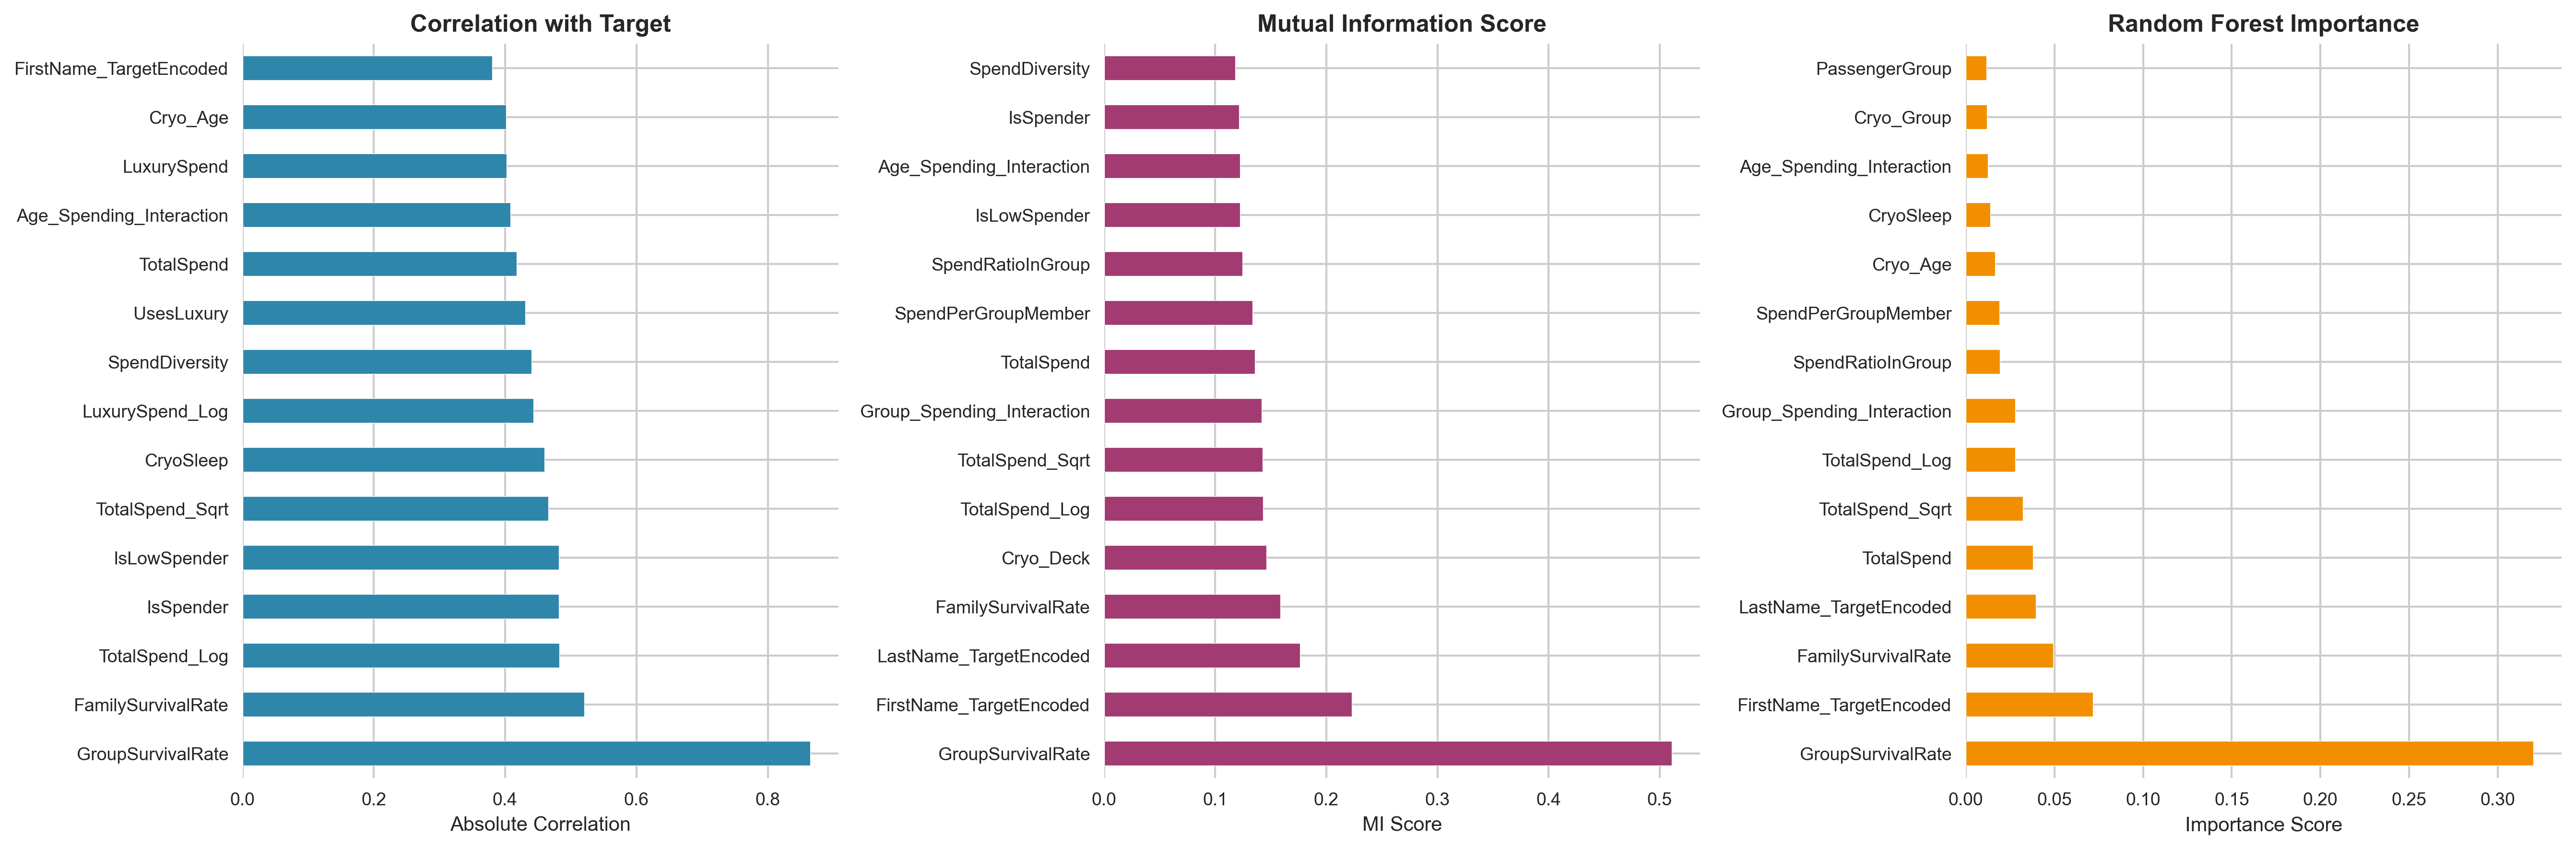


🔥 TOP 10 FEATURES BY CORRELATION:
    1. GroupSurvivalRate              0.8643
    2. FamilySurvivalRate             0.5207
    3. TotalSpend_Log                 0.4822
    4. IsSpender                      0.4816
    5. IsLowSpender                   0.4816
    6. TotalSpend_Sqrt                0.4657
    7. CryoSleep                      0.4601
    8. LuxurySpend_Log                0.4433
    9. SpendDiversity                 0.4402
   10. UsesLuxury                     0.4304

🧠 TOP 10 FEATURES BY MUTUAL INFORMATION:
    1. GroupSurvivalRate              0.5107
    2. FirstName_TargetEncoded        0.2229
    3. LastName_TargetEncoded         0.1762
    4. FamilySurvivalRate             0.1588
    5. Cryo_Deck                      0.1463
    6. TotalSpend_Log                 0.1430
    7. TotalSpend_Sqrt                0.1427
    8. Group_Spending_Interaction     0.1419
    9. TotalSpend                     0.1358
   10. SpendPerGroupMember            0.1337

🌳 TOP 10 FEATURES BY R

In [44]:
# 1. Load the raw dataset
df_train = pd.read_csv("https://raw.githubusercontent.com/stepthom/869_course/refs/heads/main/data/spaceship_titanic_train.csv")

# 2. Run the full feature engineering pipeline (ensure the function is defined)
df_processed_train = run_feature_engineering_pipeline(df_train)

# 3: Export the complete processed dataframe
df_processed_train.to_csv('train_dataset_spaceship_titanic_processed.csv', index=False)
print(f"   ✅ Complete dataset exported: train_dataset_spaceship_titanic_processed.csv")
print(f"   📊 Shape: {df_processed_train.shape}")

In [45]:
# 1. Load the raw dataset for Test set
df_test = pd.read_csv("https://raw.githubusercontent.com/stepthom/869_course/refs/heads/main/data/spaceship_titanic_test.csv")

# 2. Run the full feature engineering pipeline (ensure the function is defined)
df_processed_test = run_feature_engineering_pipeline(df_test)

# 3: Export the complete processed dataframe
df_processed_test.to_csv('test_dataset_spaceship_titanic_processed.csv', index=False)
print(f"   ✅ Complete dataset exported: test_dataset_spaceship_titanic_processed.csv")
print(f"   📊 Shape: {df_processed_test.shape}")

🚀 SPACESHIP TITANIC FEATURE ENGINEERING PIPELINE
🔧 Basic Missing Value Imputation...
   → Remaining missing values: 94
📊 Outlier Detection & Treatment...
   → RoomService: 919 outliers capped
   → FoodCourt: 931 outliers capped
   → ShoppingMall: 912 outliers capped
   → Spa: 921 outliers capped
   → VRDeck: 927 outliers capped
   → Age outliers: 0
   → Spending outliers flagged: 193
🔍 Engineering Passenger Group Features...
   → Using default GroupSurvivalRate for test set
   → Group sizes: 1-8
   → Solo travelers: 2,340 (54.7%)
🔧 Advanced Missing Value Imputation...
   → Applied hierarchical age imputation
🏢 Engineering Cabin Features...
   → Decks found: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown']
   → Starboard preference: 48.9%
💰 Engineering Spending Features...
   → Non-spenders: 1,804 (42.2%)
   → High spenders: 1,067 (24.9%)
👤 Engineering Demographic Features...
   → Using default survival rates for test set
   → Children: 351 (8.2%)
   → CryoSleep users: 1,544 (36.1%)


In [46]:
df_processed_test.head(5)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HasAgeOutlier,...,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_Unknown,CabinSide_S,CabinSide_U
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0,...,False,False,False,False,False,True,False,False,True,False
1,0018_01,0,19.0,0,0.0,9.0,0.0,107.5,0.0,0,...,False,False,False,False,True,False,False,False,True,False
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
3,0021_01,0,38.0,0,0.0,165.0,0.0,107.5,77.5,0,...,False,True,False,False,False,False,False,False,True,False
4,0023_01,0,20.0,0,10.0,0.0,67.5,0.0,0.0,0,...,False,False,False,False,True,False,False,False,True,False
